In [10]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
from skimage.external.tifffile import imread
from skimage import io
import os
from os.path import join as oj
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate, train_test_split
from scipy import ndimage

import data 
X, Y = data.get_data()

# extract single series as feature

In [11]:
X_feat, y_max = data.extract_single_pixel_features(X, Y)
print('shapes', X_feat.shape, Y_max.shape)

shapes (114750, 300) (114750, 1)


In [12]:
# m.fit(X_feat, Y_max)
X_train, X_test, Y_train, Y_test = train_test_split(X_feat, y_max, test_size=0.33, random_state=42)
# results = cross_validate(m, X_feat, y_max, cv=2, return_train_score=True, return_estimator=True)

# predict reg

In [16]:
m = LinearRegression()
# m = MLPRegressor()

In [17]:
m.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
m.score(X_test, Y_test)

0.01716990600299928

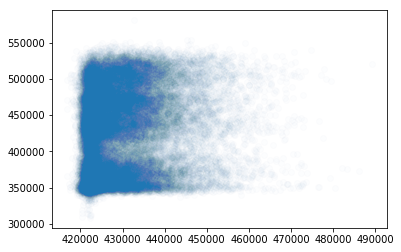

In [19]:
plt.plot(m.predict(X_test), Y_test, 'o', alpha=0.01)
plt.show()

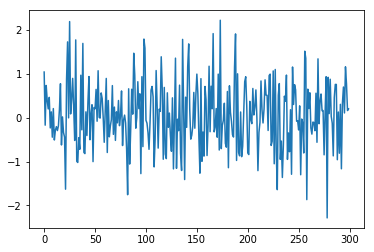

In [24]:
plt.plot(m.coef_.flatten())

## predict logistic

In [33]:
thresh = np.percentile(Y_train, 70)

In [34]:
Y_thresh_train = 1 * (Y_train > thresh)
Y_thresh_test = 1 * (Y_test > thresh)

In [35]:
m = LogisticRegression()

In [36]:
m.fit(X_train, Y_thresh_train)

/accounts/projects/vision/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/accounts/projects/vision/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
m.score(X_test, Y_thresh_test)

0.7010932713636844

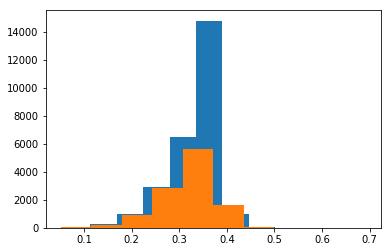

In [39]:
preds = m.predict_proba(X_test)[:, 1:2]
plt.hist(preds[Y_thresh_test==0])
plt.hist(preds[Y_thresh_test==1])
plt.show()
# plt.plot(, Y_thresh_test, 'o', alpha=0.5)

# fit a non-linear model